In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from scipy import stats
import statsmodels.formula.api as smf
import statsmodels.api as sm

In [81]:
df = pd.read_csv("data/lego.population.csv", sep = ",", encoding = "latin1")
df.head()

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
0,41916,Extra Dots - Series 2,DOTS,109.0,$3.99,$3.44,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
1,41908,Extra Dots - Series 1,DOTS,109.0,$3.99,$3.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,6.0,Retail,Small
2,11006,Creative Blue Bricks,Classic,52.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,28.0,Retail,Small
3,11007,Creative Green Bricks,Classic,60.0,$4.99,$4.93,2020,Ages_4+,37.0,NaN,Box,NaN,36.0,Retail,Small
4,41901,Funky Animals Bracelet,DOTS,33.0,$4.99,$4.99,2020,Ages_6+,NaN,NaN,Foil pack,NaN,10.0,Retail,Small


In [82]:
# fjerner observasjoner med manglende datapunkter
df = df.dropna()

# gjør themes om til string og fjern alle tegn vi ikke vil ha med
df['Theme'] = df['Theme'].astype(str)
df['Theme'] = df['Theme'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# gjør set name om til string og fjern alle tegn vi ikke vil ha med
df['Set_Name'] = df['Set_Name'].astype(str)
df['Set_Name'] = df['Set_Name'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# gjør packaging om til string og fjern alle tegn vi ikke vil ha med
df['Packaging'] = df['Packaging'].astype(str)
df['Packaging'] = df['Packaging'].str.replace(r'[^a-zA-Z0-9\s\+-]', '', regex=True)

# gjør ages om til string og fjern alle tegn vi ikke vil ha med, men ha med + og -
df['Ages'] = df['Ages'].astype(str)
df['Ages'] = df['Ages'].str.replace(r'[^a-zA-Z0-9\s\+-]', '', regex=True)

# gjør size om til string og fjern alle tegn vi ikke vil ha med
df['Size'] = df['Size'].astype(str)
df['Size'] = df['Size'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# gjør availability om til string og fjern alle tegn vi ikke vil ha med
df['Availability'] = df['Availability'].astype(str)
df['Availability'] = df['Availability'].str.replace(r'[^a-zA-Z0-9\s-]', '', regex = True)

# fjerner dollartegn og trademark-tegn fra datasettet
df['Price'] = df['Price'].str.replace('\$', '', regex = True)
df['Amazon_Price'] = df['Amazon_Price'].str.replace('\$', '', regex = True)

# og gjør så prisen om til float
df['Price'] = df['Price'].astype(float)
df['Amazon_Price'] = df['Amazon_Price'].astype(float)

# Remove everything inside parentheses along with the parentheses themselves
df['Weight'] = df['Weight'].str.replace(r"\s*\(.*\)\s*", "", regex=True)
df['Weight'] = df['Weight'].str.replace('Kg', '', regex=True)
df['Weight'] = df['Weight'].str.strip()
df['Weight'] = df['Weight'].astype(float)

# gjør om year til float
df['Year'] = df['Year'].astype(float)

df

,Item_Number,Set_Name,Theme,Pieces,Price,Amazon_Price,Year,Ages,Pages,Minifigures,Packaging,Weight,Unique_Pieces,Availability,Size
19,60239,Police Patrol Car,City,92.0,9.99,8.35,2019.0,Ages5+,36.0,1.0,Box,0.15,52.0,Retail - limited,Small
20,41452,Prince Puppycorn Trike,Unikitty,101.0,9.99,8.95,2018.0,Ages5-12,56.0,3.0,Box,0.15,65.0,Retail,Small
24,10900,Police Bike,DUPLO,8.0,9.99,8.99,2019.0,Ages2+,10.0,1.0,Box,0.18,7.0,Retail,Large
27,60212,Barbecue Burn Out,City,64.0,9.99,8.99,2019.0,Ages4+,28.0,2.0,Box,0.13,45.0,Retail,Small
28,60251,Monster Truck,City,55.0,9.99,8.99,2020.0,Ages5+,32.0,1.0,Box,0.14,34.0,Retail,Small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
808,60188,Mining Experts Site,City,883.0,99.99,239.97,2018.0,Ages7-12,244.0,6.0,Box,1.89,284.0,Retail,Small
809,60200,Capital City,City,1211.0,149.99,244.87,2018.0,Ages6-12,441.0,13.0,Box,2.42,489.0,Retail - limited,Small
812,75212,Kessel Run Millennium Falcon,Star Wars,1414.0,169.99,254.96,2018.0,Ages9-14,208.0,7.0,Box,2.57,318.0,Retail,Small
819,10261,Roller Coaster,Creator Expert,4124.0,379.99,379.95,2018.0,Ages16+,440.0,11.0,Box,5.80,556.0,Retail - limited,Small


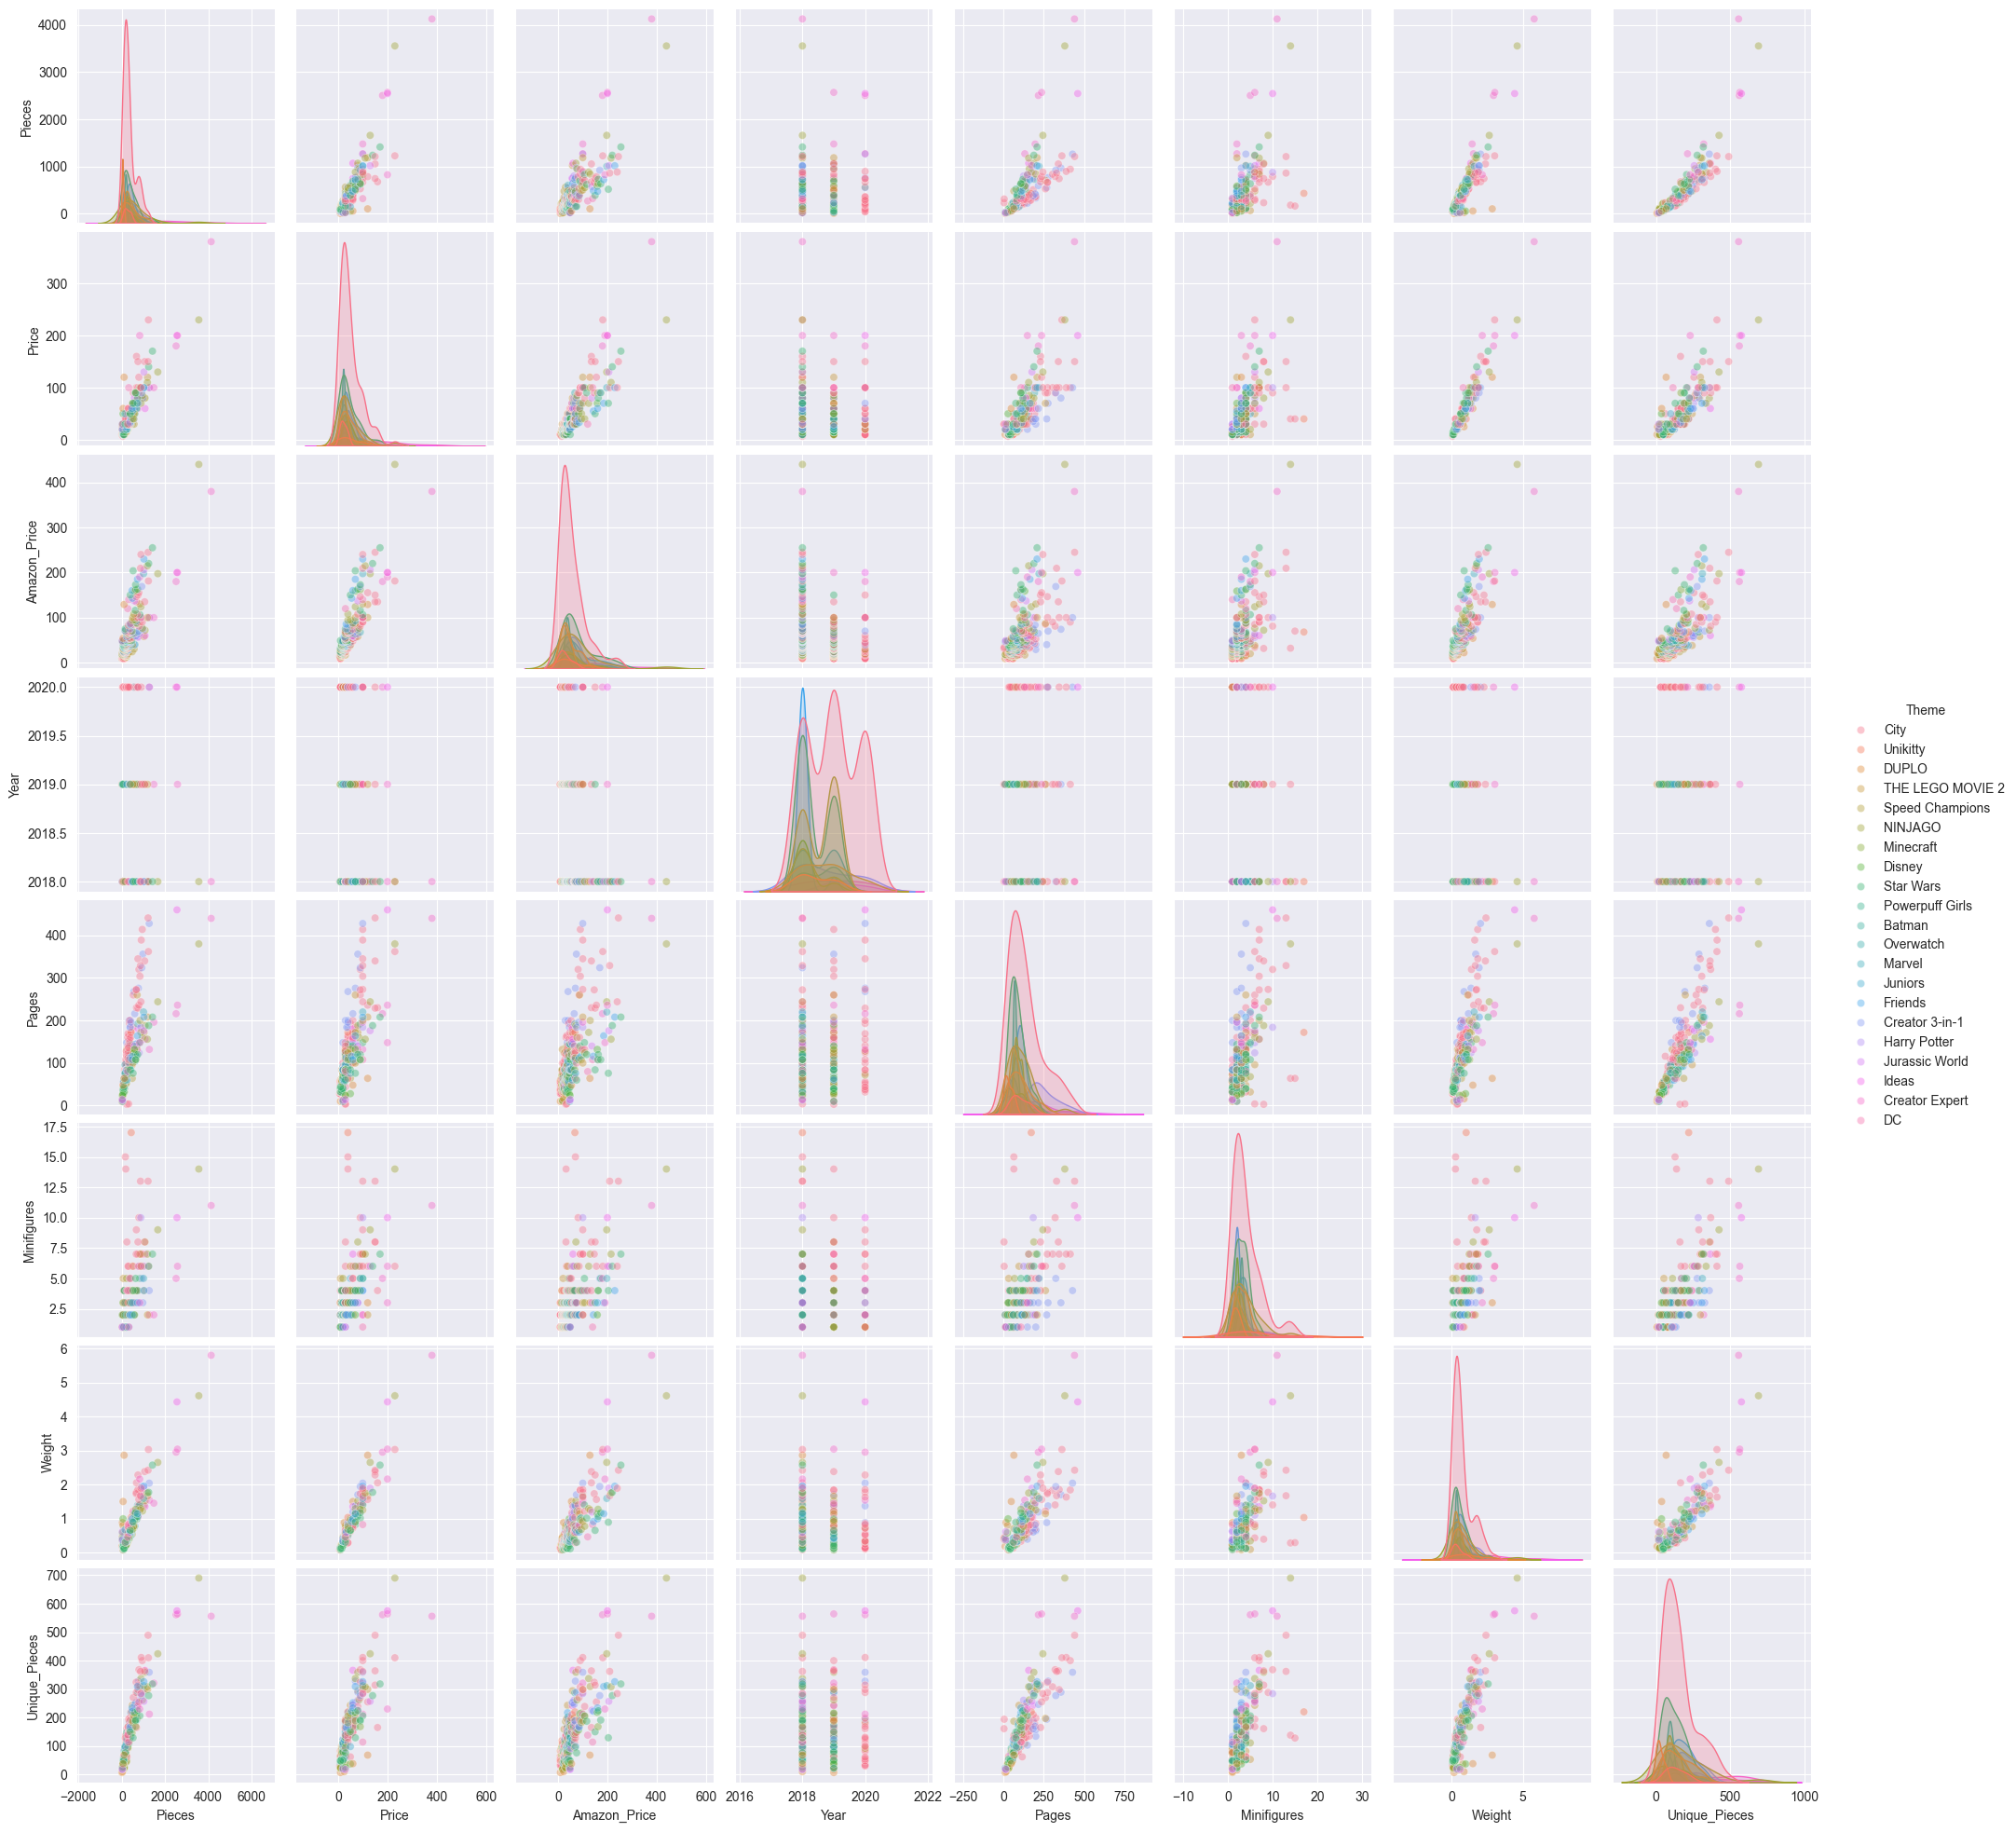

In [86]:
sns.pairplot(df, 
             #vars = ['Theme', 'Pieces', 'Price', 'Amazon_Price', 'Year', 'Ages', 'Pages', 'Minifigures', 'Packaging', 'Weight', 'Unique_Pieces'],
             vars = ['Pieces', 'Price', 'Amazon_Price', 'Year', 'Pages', 'Minifigures', 'Weight', 'Unique_Pieces'],
             hue = 'Theme', 
             diag_kind = 'kde',
             plot_kws = dict(alpha = 0.4))
# Save pdf, root folder -> figures
plt.savefig('../figures/lego.pairplot.pdf')
plt.show()